# Linear regression and Logistic Regression

In [329]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import numpy.linalg as la
import scipy.optimize as op
from scipy.optimize import minimize
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures 
from matplotlib import pyplot as plt

## Linear regression with one variable

### Load and plot data

The ex1data1.txt contains the dataset for our linear regression problem. 
The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss

In [2]:
cols1 = ['pop', 'profit']
data1 = pd.read_csv('data/ex1data1.txt', header = None, names = cols1)

In [3]:
data1.shape

(97, 2)

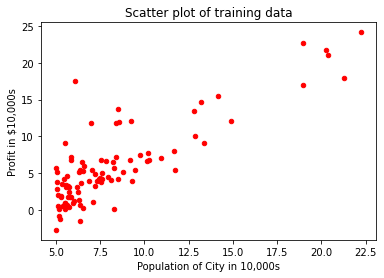

In [4]:
data1.plot(kind='scatter',x='pop',y='profit',color='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')
plt.show()

### Loss function and Gradient Descent

In [53]:
X = pd.DataFrame(data1['pop']).to_numpy()
y = pd.DataFrame(data1['profit']).to_numpy()

# Add a column of ones to X
myX = np.append(np.ones([len(X),1]), X ,1)
myX = myX.T
y = y.T

# Initialize fitting parameters
d = myX.shape[0] # Dimensions of theta / number of features
init_theta = np.zeros((d, 1))

In [55]:
print('myX shape:', myX.shape)
print('intial theta shape:', init_theta.shape)
print('y shape:', y.shape)

myX shape: (2, 97)
intial theta shape: (2, 1)
y shape: (1, 97)


In [48]:
def computeCost(X, y, theta):
    
    # The function computes the cost of using theta as the parameter 
    # for linear regression to fit the data points in X and y

    m = len(y.T) # number of training examples

    cost = ((theta.T @ X - y) @ (theta.T @ X - y).T / (2 * m)).item()
    
    return cost

In [56]:
print('\nTesting the cost function ...\n')
# compute and display initial cost
J = computeCost(myX, y, init_theta)
print('With theta = [0 , 0]\nCost computed = %f\n'% J)
print('Expected cost value (approx) 32.07\n')

# further testing of the cost function
J = computeCost(myX, y, np.array([-1 , 2]).reshape(-1,1))
print('\nWith theta = [-1 ; 2]\nCost computed = %f\n'% J)
print('Expected cost value (approx) 54.24\n')


Testing the cost function ...

With theta = [0 , 0]
Cost computed = 32.072734

Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed = 54.242455

Expected cost value (approx) 54.24



In [75]:
def gradientDescent(X, y, theta, alpha, num_iters):

    # The function performs gradient descent to learn theta
    # It updates theta by taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y.T) # number of training examples
    loss = []
    
    for i in range(num_iters):
        
        J_theta = computeCost(X, y, theta)
        
        delta_J_0 = np.mean(theta.T @ X - y, axis=1).item()
        delta_J_1 = ((theta.T @ X - y) @ (X[1, :].T / m)).item()
    
        delta = np.array([delta_J_0, delta_J_1]).reshape(-1,1)
        theta = theta - alpha * delta
        
        loss.append(J_theta)
 
        i +=1
    return theta, loss

In [76]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01

# run gradient descent
theta, loss = gradientDescent(myX, y, init_theta, alpha, iterations)

In [67]:
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')

Theta found by gradient descent:
 [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




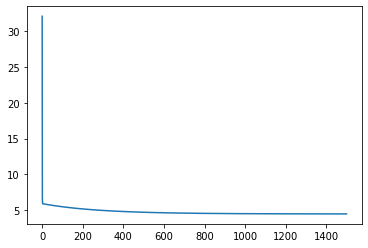

In [90]:
# Plot the convergence graph
plt.plot(loss)
#plt.yscale('log')

In [70]:
# To make predictions on profits in areas of 35,000 and 70,000 people
predict1 = theta.T @ [1, 3.5]
predict2 = theta.T @ [1, 7]

In [71]:
predict1, predict2

(array([0.45197679]), array([4.53424501]))

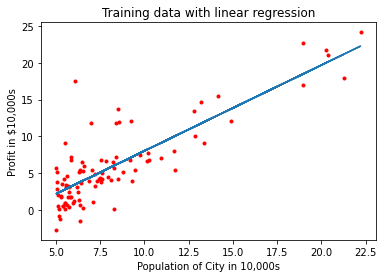

In [80]:
plt.plot(data1['pop'], data1['profit'], '.', color = 'red')
plt.plot(X, theta[0] + theta[1] * X, '-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Training data with linear regression')
3plt.show()

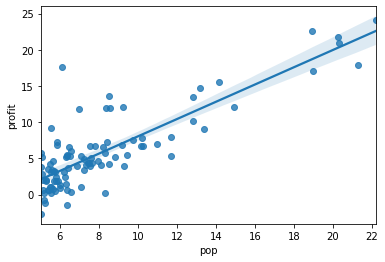

In [83]:
# Compare with gragh using seaborn
sns.regplot(x='pop', y='profit', data=data1)

## Linear regression with multiple variables

### Plot the data

The ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [84]:
cols2 = ['size', 'num_of_bedrooms', 'housing_price']
data2 = pd.read_csv('data/ex1data2.txt', header = None, names = cols2)

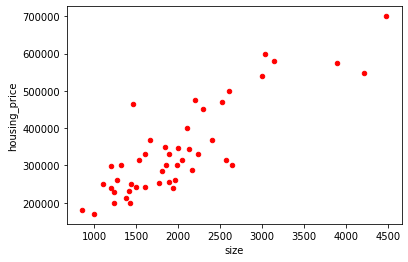

In [85]:
data2.plot(kind='scatter',x='size',y='housing_price',color='red')
plt.show()

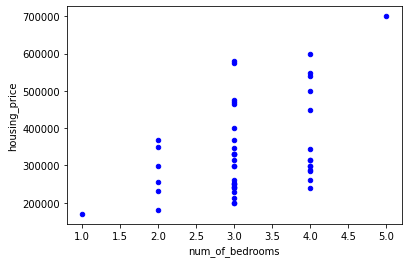

In [86]:
data2.plot(kind='scatter',x='num_of_bedrooms',y='housing_price',color='blue')
plt.show()

### Feature normalization

In [87]:
# pandas.DataFrame.values: Return a Numpy representation of the DataFrame.
X = data2[['size','num_of_bedrooms']].values
y = pd.DataFrame(data2['housing_price']).to_numpy()

# Transpose X to make it [d,n], where d is dimension of features, n is number of samples
X = X.T
y = y.T

In [88]:
def feature_norm(X):
    d = X.shape[0]
    n = X.shape[1]
    X_norm = np.zeros(X.shape)
    for d in range(X.shape[0]):
        mean = np.mean(X[d, :])
        std = np.std(X[d, :])
        print(mean, std)
        X_norm[d, :] = (X[d, :] - mean)/std
    return X_norm, mean, std

In [89]:
X_norm, mean, std = feature_norm(X)

2000.6808510638298 786.2026187430467
3.1702127659574466 0.7528428090618781


In [93]:
# Add a row of ones to X
myX = np.append(np.ones([1, X.shape[1]]), X_norm ,0)

In [94]:
print('myX shape:', myX.shape)
print('theta shape:', theta.shape)
print('y shape:', y.shape)

myX shape: (3, 47)
theta shape: (2, 1)
y shape: (1, 47)


### Gradient Descent with multiple variables

In [95]:
def gradient_descent(iterations, alpha, myX, y):
    # Initialize fitting parameters
    d = myX.shape[0] # Dimensions of theta / number of features
    theta = np.zeros((d, 1));
    loss = []
    for i in range(iterations):
        # Cost function: mean squared error as a function of theta 1, 2, ..., d
        J_theta =((theta.T @ myX - y) @ (theta.T @ myX - y).T / (2 * len(y))).item()
        n = y.shape[1]
        delta = ((theta.T @ myX - y) @ myX.T / n).T
        theta = theta - alpha * delta
        loss.append(J_theta)
        i +=1
    return theta, loss

In [96]:
theta1, loss1 = gradient_descent(500, 0.01, myX, y)

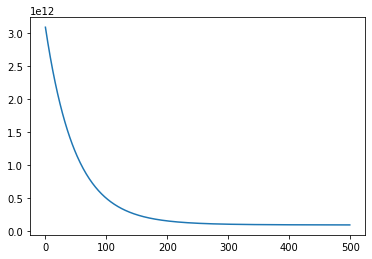

In [97]:
# Plot the convergence graph
plt.plot(loss1)
#plt.yscale('log')

### Selecting learning rate

In [99]:
theta1, loss1 = gradient_descent(500, 0.01, myX, y)
theta2, loss2 = gradient_descent(500, 0.03, myX, y)
theta3, loss3 = gradient_descent(500, 0.1, myX, y)
theta4, loss4 = gradient_descent(500, 0.3, myX, y)
theta5, loss5 = gradient_descent(500, 1, myX, y)

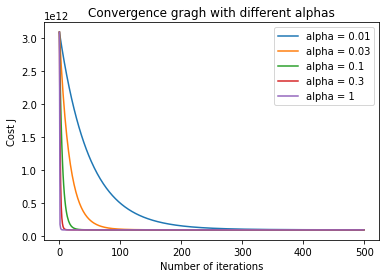

In [103]:
plt.plot(loss1, label='alpha = 0.01')
plt.plot(loss2, label='alpha = 0.03')
plt.plot(loss3, label='alpha = 0.1')
plt.plot(loss4, label='alpha = 0.3')
plt.plot(loss5, label='alpha = 1')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence gragh with different alphas')
plt.legend()

In [101]:
theta1, theta2, theta3, theta4, theta5

(array([[ 3.38175984e+05],
        [ 1.03032124e+05],
        [-2.02325233e+02]]), array([[340412.57680449],
        [109372.3081412 ],
        [ -6502.86652974]]), array([[340412.65957447],
        [109447.79645983],
        [ -6578.35484435]]), array([[340412.65957447],
        [109447.79646964],
        [ -6578.35485416]]), array([[340412.65957447],
        [109447.79646964],
        [ -6578.35485416]]))

### Made a prediction

In [106]:
# Estimate the price of a 1650 sq-ft, 3 br house
X_test = [(1650 - 2000.6808510638298)/786.2026187430467, (3-3.1702127659574466)/0.7528428090618781]
X_test = [1, -0.4460438603276164, -0.2260933675776883]
price = (theta5.T @ X_test).item()
print('Predicted price of a 1650 sq-ft, 3 br house ' 
         '(using gradient descent):\n $%f\n'% price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293081.464335



## Normal Equations

theta = (inv(X.T @ X)) @ X.T @ y

In [107]:
X = data2[['size','num_of_bedrooms']].values

X = np.append(np.ones([len(X),1]), X ,1)

y = pd.DataFrame(data2['housing_price']).to_numpy()


In [108]:
theta = (la.inv(X.T @ X)) @ X.T @ y

In [109]:
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [110]:
X_test = [1, 1650, 3]

In [111]:
theta.T @ X_test

array([293081.46433489])

## Logistic Regression: binary classes

### Load and plot the data

In [292]:
cols1 = ['exam1_score', 'exam2_score', 'admitted']
data1 = pd.read_csv('data/ex2data1.txt', header = None, names = cols1)

In [293]:
data1.head(10)

,exam1_score,exam2_score,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [115]:
data1.shape

(100, 3)

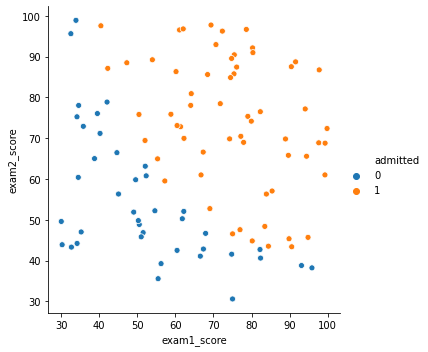

In [295]:
sns.relplot(x="exam1_score", y="exam2_score", 
            hue="admitted", kind="scatter",
            data=data1)

### Sigmoid function

In [117]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [118]:
# Test: 
sigmoid(0)
sigmoid(10)
sigmoid(-10)
x = np.array([0,1,2])
y = np.array([[1,0,2],[3,2,5]])
sigmoid(x)
sigmoid(y)

array([[0.73105858, 0.5       , 0.88079708],
       [0.95257413, 0.88079708, 0.99330715]])

### Cost function and gradient

In [31]:
### Function to return the cost and gradient

In [296]:
# Prepare training dataset
# Assume features include only the first-order exam scores. Therefore g(X) = theta0 + theta1 * x1 + theta * x2
X = data1[['exam1_score', 'exam2_score']].values
y = data1['admitted'].to_numpy()

# Input X has dimensions (n, d), y has dimensions (n,1)
myX = np.append(np.ones([len(X),1]), X ,1)
y = y.reshape(-1,1) 

In [297]:
# Initialize theta. theta has dimensions (d,1)
d = myX.shape[1]
theta = np.zeros([d, 1])

In [298]:
gX = myX @ theta
hX = sigmoid(gX)
loss = (-1/len(y) * (y.T @ np.log(hX) + (1-y).T @ np.log(1-hX))).item()
derivative= 1/len(y) * myX.T @ (hX - y)

theta = theta - alpha * derivative

In [299]:
def costFunction(theta, X, y):
    gX = X @ theta   # gX has shape (N,1)
    hX = sigmoid(gX)   # hX has shape (N,1)
    n = len(y)   #
    loss = ((1/n) * (- y.T @ np.log(hX) - (1-y).T @ np.log(1-hX))).item()
    #derivative = (1/n) * myX.T @ (hX - y)
    return loss

def gradientFunction(theta, X, y):
    gX = X @ theta   # gX has shape (N,1)
    hX = sigmoid(gX).reshape(-1, 1)   # hX has shape (N,1)
    n = len(y)   #
    derivative = (1/n) * X.T @ (hX - y)
    derivative = derivative.squeeze()
    return derivative

### Learning parameters


In [300]:
# Initialize theta
initial_theta = np.zeros((d, 1))

#### scipy.optimize.fmin

In [482]:
## Minimize a function using the downhill simplex algorithm 
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html)

In [301]:
Result = op.fmin(func = costFunction, 
                 x0 = initial_theta, 
                 args = (myX, y)
                        );

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [220]:
Result

array([-25.16130062,   0.20623142,   0.20147143])

#### scipy.optimize.fmin_ncg

In [140]:
## Newton-Conjugate-Gradient
## https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
## https://github.com/scipy/scipy/blob/master/scipy/optimize/tests/test_optimize.py#L344

In [127]:
import scipy
scipy.__version__

'1.4.1'

In [221]:
gradientFunction(initial_theta, myX, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [222]:
retval  = op.fmin_ncg(f = costFunction, 
                x0 = initial_theta, 
                fprime = gradientFunction,
                args = (myX, y),
                full_output=False,
                retall=False)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 27
         Function evaluations: 70
         Gradient evaluations: 232
         Hessian evaluations: 0


In [131]:
retval

array([-25.14561716,   0.20610601,   0.20134442])

#### scipy.optimize.fmin_bfgs

In [132]:
# alternative to octave's fminunc, which uses some form of bfgs

In [302]:
retval = op.fmin_bfgs(f = costFunction, 
                x0 = initial_theta, 
                fprime = gradientFunction,
                args = (myX, y),
                full_output=False,
                retall=False)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


/Users/juersong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/juersong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in matmul
  """


In [303]:
retval

array([-25.16133284,   0.2062317 ,   0.2014716 ])

#### My gradient descent

In [137]:
def optimizeLogisticRegression(X, y, theta, iterations, alpha):
    loss = []
    for i in range(iterations):
        cost = costFunction(theta, X, y)
        derivative = gradientFunction(theta,X,y).reshape(-1,1)
        theta = theta - alpha * derivative
        loss.append(cost)
        i += 1
    return loss, theta

In [138]:
initial_theta = np.zeros((d, 1));
loss, return_theta = optimizeLogisticRegression(myX, y, initial_theta, iterations=1000000, alpha=0.001)

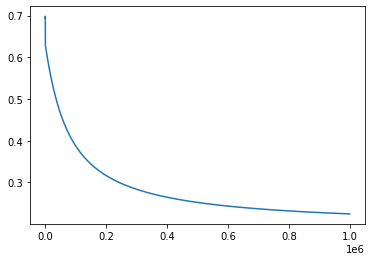

In [139]:
plt.plot(loss)

It takes a very long time and many iterations (1MM) to get it to the converge!

In [588]:
## call your costFunction using the initial parameters of theta. 
## You should see that the cost is about 0.693.
print(loss[0]) 

0.6931471805599453


In [590]:
print(loss[-1])

0.2246541908824744


Compared to scipy optimize functions, which reports "Current function value: 0.203498". After 1MM iterations, it still hasn't converged.

### Predict

In [304]:
def PredictLogisticRegression(X_test, theta):
    hX = sigmoid(X_test @ theta)   # hX has shape (N,1)
    
    yhead = hX > 0.5
    
    yhead = yhead.reshape(-1,1)

    return hX, yhead

For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776.

In [305]:
X_test = np.array([1, 45, 85]).reshape(-1,1).T

In [306]:
prob, yhead = PredictLogisticRegression(X_test, retval)

In [307]:
print('For a student with scores 45 and 85, we predict an admission '
         'probability of %f\n'% prob)
print('Expected value: 0.775 +/- 0.002\n\n')

For a student with scores 45 and 85, we predict an admission probability of 0.776291

Expected value: 0.775 +/- 0.002




### Plot decision boundary

In [358]:
## theta0 + theta1 * x1 + theta2 * x2 = 0
## ==> x2 = -1/theta2 * (theta0 + theta1 * x1)

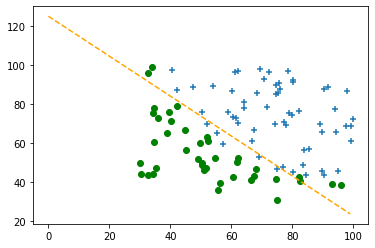

In [148]:
ax = plt.gca()
#ax.autoscale(False)
x1_vals = np.arange(100)
x2_vals = -1/retval[2] * (retval[0] + retval[1] * x1_vals)
plt.plot(x1_vals, x2_vals, '--', c="orange")

plt.scatter(data1[data1['admitted']==1]["exam1_score"],
            data1[data1['admitted']==1]["exam2_score"], marker='+')
plt.scatter(data1[data1['admitted']==0]["exam1_score"],
            data1[data1['admitted']==0]["exam2_score"], c= 'green', marker='o')


## Regularized logistic regression

### Plotting the data

In [308]:
cols2 = ['Microchip_Test_1', 'Microchip_Test_2', 'Accepted']
data2 = pd.read_csv('data/ex2data2.txt', header = None, names = cols2)

In [268]:
data2.tail(5)

,Microchip_Test_1,Microchip_Test_2,Accepted
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


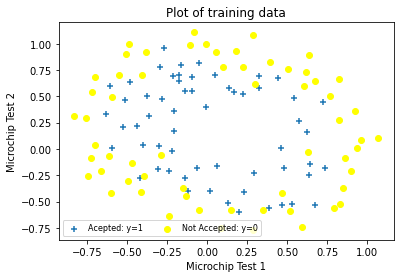

In [249]:
x1 = plt.scatter(data2[data2['Accepted']==1]["Microchip_Test_1"],
            data2[data2['Accepted']==1]["Microchip_Test_2"], marker='+')
x2 = plt.scatter(data2[data2['Accepted']==0]["Microchip_Test_1"],
            data2[data2['Accepted']==0]["Microchip_Test_2"], c= 'yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Plot of training data')
plt.legend((x1,x2),('Acepted: y=1', 'Not Accepted: y=0'),loc='lower left', ncol=3, fontsize=8)
plt.show()

### Feature mapping

In [153]:
# we will map the features into all polynomial terms of x1 and x2 up to the sixth power.

In [309]:
from sklearn.preprocessing import PolynomialFeatures  
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [310]:
X2 = data2[['Microchip_Test_1', 'Microchip_Test_2']].values
y2 = data2['Accepted'].to_numpy().reshape(-1,1)

In [311]:
poly = PolynomialFeatures(6)
X2t = poly.fit_transform(X2)

### Cost function and gradient

In [312]:
def costFunctionReg(theta, X, y, bambda):
    gX = X @ theta
    hX = sigmoid(gX)
    n = len(y)
    loss = ((1/n) * (- y.T @ np.log(hX) - (1-y).T @ np.log(1-hX)) +
           bambda / (2 *n) * (theta[1:].T @ theta[1:])).item()
    return loss
    

def gradFunctionReg(theta, X, y, bambda):
    gX = X @ theta   # gX has shape (N,1)
    hX = sigmoid(gX).reshape(-1, 1)   # hX has shape (N,1)
    n = len(y)
    thetap = (np.insert(theta[1:], obj= 0, values = 0)).reshape(-1,1)
    derivative = (1/n) * X.T @ (hX - y) + bambda / n * thetap
    derivative = derivative.squeeze()
    return derivative


In [313]:
# Initialize theta
d = X2t.shape[1]
initial_theta = np.zeros([d, 1])

In [274]:
# Set regularization parameter bambda to 1
bambda = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost = costFunctionReg(initial_theta, X2t, y2, bambda)
grad = gradFunctionReg(initial_theta, X2t, y2, bambda)


print('Cost at initial theta (zeros): %f\n'% cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')


# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones([d,1])
test_bambda = 10
test_cost = costFunctionReg(test_theta, X2t, y2, test_bambda)
test_grad = gradFunctionReg(test_theta, X2t, y2, test_bambda)


print('\nCost at test theta (with lambda = 10): %f\n', test_cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
print(test_grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')


Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): %f
 3.16450933161501
Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



### Learning the parameters

In [314]:
bambda = 1
learned_theta = op.fmin_bfgs(f = costFunctionReg, 
                x0 = initial_theta, 
                fprime = gradFunctionReg,
                args = (X2t, y2, bambda),
                full_output=False,
                retall=False)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


In [315]:
# Compute accuracy on training set
p, yhead = PredictLogisticRegression(X2t, learned_theta)

print('Train Accuracy: %f\n', np.mean((yhead == y2)) * 100)
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')

Train Accuracy: %f
 83.05084745762711
Expected accuracy (with lambda = 1): 83.1 (approx)



### Plot decision boundary

In [279]:
# X - some data in 2dimensional np.array
x1_min, x1_max = data2['Microchip_Test_1'].min() - 1, data2['Microchip_Test_1'].max() + 1
x2_min, x2_max = data2['Microchip_Test_2'].min() - 1, data2['Microchip_Test_2'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.25),
                     np.arange(x2_min, x2_max, 0.25))

In [280]:
x1 = xx1.flatten().reshape(-1,1)
x2 = xx2.flatten().reshape(-1,1)
x3 = np.column_stack((x1,x2))

In [281]:
poly = PolynomialFeatures(6)
X_grid = poly.fit_transform(x3)

In [282]:
Z = sigmoid(X_grid @ learned_theta.reshape(-1,1))
Z = Z.reshape(xx1.shape)

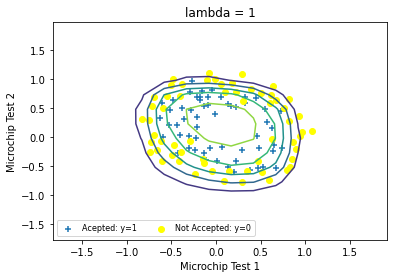

In [319]:
# Put the result into a color plot
plt.contour(xx1, xx2, Z)
plt.axis('on')

# Plot also the training points
x1 = plt.scatter(data2[data2['Accepted']==1]["Microchip_Test_1"],
            data2[data2['Accepted']==1]["Microchip_Test_2"], marker='+')
x2 = plt.scatter(data2[data2['Accepted']==0]["Microchip_Test_1"],
            data2[data2['Accepted']==0]["Microchip_Test_2"], c= 'yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('lambda = 1')
plt.legend((x1,x2),('Acepted: y=1', 'Not Accepted: y=0'),loc='lower left', ncol=3, fontsize=8)
plt.show()

### Change regularization terms

To try different values of lambda and see how regularization affects the decision and accuracy.
Try the following values of lambda (0, 1, 10, 100).

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547
Train Accuracy: %f
 91.52542372881356


/Users/juersong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


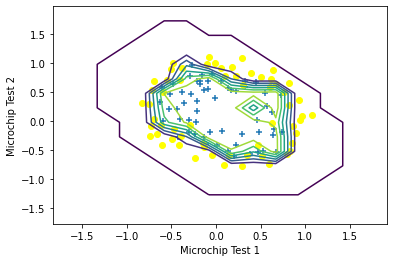

In [320]:
bambda = 0
learned_theta = op.fmin_bfgs(f = costFunctionReg, 
                x0 = initial_theta, 
                fprime = gradFunctionReg,
                args = (X2t, y2, bambda),
                full_output=False,
                retall=False)

Z1 = sigmoid(X_grid @ learned_theta.reshape(-1,1))
Z1 = Z1.reshape(xx1.shape)
# Put the result into a color plot
plt.contour(xx1, xx2, Z1)
plt.axis('on')

# Plot also the training points
x1 = plt.scatter(data2[data2['Accepted']==1]["Microchip_Test_1"],
            data2[data2['Accepted']==1]["Microchip_Test_2"], marker='+')
x2 = plt.scatter(data2[data2['Accepted']==0]["Microchip_Test_1"],
            data2[data2['Accepted']==0]["Microchip_Test_2"], c= 'yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Compute accuracy on training set
p, yhead = PredictLogisticRegression(X2t, learned_theta)

print('Train Accuracy: %f\n', np.mean((yhead == y2)) * 100)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Train Accuracy: %f
 83.05084745762711


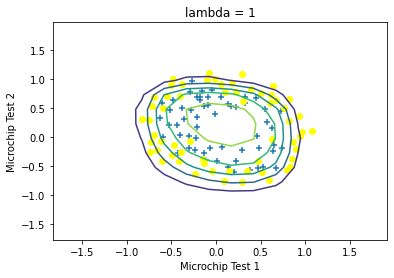

In [325]:
bambda = 1
learned_theta = op.fmin_bfgs(f = costFunctionReg, 
                x0 = initial_theta, 
                fprime = gradFunctionReg,
                args = (X2t, y2, bambda),
                full_output=False,
                retall=False)

Z1 = sigmoid(X_grid @ learned_theta.reshape(-1,1))
Z1 = Z1.reshape(xx1.shape)
# Put the result into a color plot
plt.contour(xx1, xx2, Z1)
plt.axis('on')

# Plot also the training points
x1 = plt.scatter(data2[data2['Accepted']==1]["Microchip_Test_1"],
            data2[data2['Accepted']==1]["Microchip_Test_2"], marker='+')
x2 = plt.scatter(data2[data2['Accepted']==0]["Microchip_Test_1"],
            data2[data2['Accepted']==0]["Microchip_Test_2"], c= 'yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('lambda = 1')

# Compute accuracy on training set
p, yhead = PredictLogisticRegression(X2t, learned_theta)

print('Train Accuracy: %f\n', np.mean((yhead == y2)) * 100)

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Train Accuracy: %f
 74.57627118644068


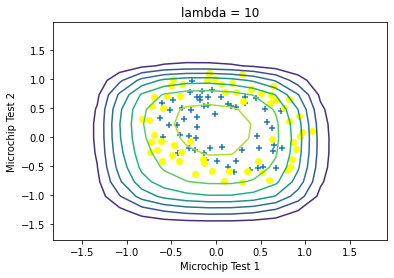

In [326]:
bambda = 10
learned_theta = op.fmin_bfgs(f = costFunctionReg, 
                x0 = initial_theta, 
                fprime = gradFunctionReg,
                args = (X2t, y2, bambda),
                full_output=False,
                retall=False)

Z1 = sigmoid(X_grid @ learned_theta.reshape(-1,1))
Z1 = Z1.reshape(xx1.shape)
# Put the result into a color plot
plt.contour(xx1, xx2, Z1)
plt.axis('on')

# Plot also the training points
x1 = plt.scatter(data2[data2['Accepted']==1]["Microchip_Test_1"],
            data2[data2['Accepted']==1]["Microchip_Test_2"], marker='+')
x2 = plt.scatter(data2[data2['Accepted']==0]["Microchip_Test_1"],
            data2[data2['Accepted']==0]["Microchip_Test_2"], c= 'yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('lambda = 10')

# Compute accuracy on training set
p, yhead = PredictLogisticRegression(X2t, learned_theta)

print('Train Accuracy: %f\n', np.mean((yhead == y2)) * 100)

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Train Accuracy: %f
 61.016949152542374


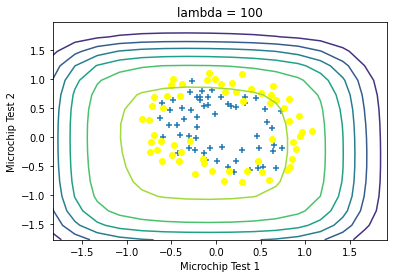

In [327]:
bambda = 100
learned_theta = op.fmin_bfgs(f = costFunctionReg, 
                x0 = initial_theta, 
                fprime = gradFunctionReg,
                args = (X2t, y2, bambda),
                full_output=False,
                retall=False)

Z1 = sigmoid(X_grid @ learned_theta.reshape(-1,1))
Z1 = Z1.reshape(xx1.shape)
# Put the result into a color plot
plt.contour(xx1, xx2, Z1)
plt.axis('on')

# Plot also the training points
x1 = plt.scatter(data2[data2['Accepted']==1]["Microchip_Test_1"],
            data2[data2['Accepted']==1]["Microchip_Test_2"], marker='+')
x2 = plt.scatter(data2[data2['Accepted']==0]["Microchip_Test_1"],
            data2[data2['Accepted']==0]["Microchip_Test_2"], c= 'yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('lambda = 100')

# Compute accuracy on training set
p, yhead = PredictLogisticRegression(X2t, learned_theta)

print('Train Accuracy: %f\n', np.mean((yhead == y2)) * 100)

## Logistic Regression: Multi-class Classification

### Load data and display image

In [333]:
matdata = loadmat('data/ex3data1.mat')
X = matdata['X']
y = matdata['y']
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (5000, 400)
y shape: (5000, 1)


There are 5000 training examples in ex3data1.mat, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a floating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is unrolled into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image.

In [336]:
def save_images(images,filename):
    
    from PIL import Image
    # Compute number of items to display
    row = int(math.floor(math.sqrt(len(images))))
    col = int(math.ceil(len(images)/row))
    
    # for each image
    w = int(math.sqrt(X.shape[1]))
    h = int(np.round(X.shape[1]/w))
    
    height = row * h
    width = col * w
    output = np.zeros((height, width))

    for i in range(row):
        for j in range(col):
            image = images[i*row+j]
            image = image.reshape(h,w)
            output[i*h:i*h + h,j*w:j*w+w] = image
    output = (output * 255).clip(0,255).astype('uint8')
    output = output.T
    im = Image.fromarray(output)
    im.save(filename)
    im.show()

In [337]:
filename = 'digits.png'
save_images(X,filename)

### One-vs-all Classication

In [349]:
y.shape
n = len(y)
y_class = np.unique(y)
print('Unique output classes:', y_class)

Unique output classes: [ 1  2  3  4  5  6  7  8  9 10]


In [346]:
# Add ones to the X data matrix
myX = np.append(np.ones([len(X),1]), X ,1)
print(myX.shape)

(5000, 401)


In [344]:
def one_vs_all_logistic_classification(X, y, bambda):
    
    retval_all = []
    
    y_class = np.unique(y)
    
    for k in y_class:
        # Initialize theta
        d = X.shape[1]
        initial_theta = np.zeros([d, 1])
        yk = 1 * (y == k) 
        retval_k = op.fmin_bfgs(f = costFunctionReg, 
                    x0 = initial_theta, 
                    fprime = gradFunctionReg,
                    args = (X, yk, bambda),
                    full_output=False,
                    retall=False)
        retval_all.append(retval_k)
        
    return retval_all

In [345]:
theta_all = one_vs_all_logistic_classification(myX, y, bambda = 0.5)

Optimization terminated successfully.
         Current function value: 0.022429
         Iterations: 203
         Function evaluations: 204
         Gradient evaluations: 204
Optimization terminated successfully.
         Current function value: 0.062418
         Iterations: 268
         Function evaluations: 269
         Gradient evaluations: 269
Optimization terminated successfully.
         Current function value: 0.066870
         Iterations: 280
         Function evaluations: 281
         Gradient evaluations: 281
Optimization terminated successfully.
         Current function value: 0.045644
         Iterations: 251
         Function evaluations: 252
         Gradient evaluations: 252
Optimization terminated successfully.
         Current function value: 0.068821
         Iterations: 284
         Function evaluations: 285
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: 0.029461
         Iterations: 230
         Function ev

### One-vs-all Prediction

Predict the label for a trained one-vs-all classifier. The labels are in the range 1..K, where K = size(all_theta, 1).  
p = predictOneVsAll(all_theta, X) will return a vector of predictions for each example in the matrix X. 
Note that X contains the examples in rows. 
all_theta is a matrix where the i-th row is a trained logistic regression theta vector for the i-th class. 
You should set p to a vector of values from 1..K 
(e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2 for 4 examples) 

In [350]:
theta_all= np.array(theta_all).T

In [351]:
X_test = X.copy()

In [352]:
def predictOneVsAll(all_theta, X_test):
    
    m = X_test.shape[0]
    ps = []
  
    k = all_theta.shape[1] # k include theta 0 (for 1 term)

    # Add ones to the X data matrix    
    X_test = np.append(np.ones([len(X_test),1]), X_test ,1)
    
    h = sigmoid(X_test @ all_theta)  # hx dimensions: (m, k). m:test size; k: number of classes 

    for i in range(m):
        p = np.argmax(h[i]) +1
        ps.append(p)
    ps = np.array(ps).T
        
    return ps

In [353]:
#Predict for One-Vs-All
pred = predictOneVsAll(theta_all, X)
pred

array([10, 10, 10, ...,  9,  9,  7])

In [354]:
print('\nTraining Set Accuracy: %f\n', np.mean((pred == y.flatten()) * 1))


Training Set Accuracy: %f
 0.9506


## Multi-class classification using pretrained neural nets

In [356]:
## You have been provided with a set of network parameters, theta1, theta2 already trained.
## The parameters have dimensions that are sized for a neural network with 25 units 
## in the second layer and 10 output units (corresponding to the 10 digit classes).

matweights = loadmat('data/ex3weights.mat')
theta1 = matweights['Theta1']
theta2 = matweights['Theta2']

In [357]:
theta1.shape

(25, 401)

In [358]:
theta2.shape

(10, 26)

In [359]:
## Predict the label of an input given a trained neural network
## outputs the predicted label of X given the trained weights of a neural network (Theta1, Theta2)
    
def predict(Theta1, Theta2, X_test):

    ## Useful values
    m = X_test.shape[0] # size of training data
    d = X_test.shape[1] # number of input features, excluding bias term 1
    num_labels = Theta2.shape[0] # dimensions of outputs
    
    ## Initialize all_p. It should be a vector containing labels between 1 to num_labels.
    all_p = []
    
    ## Add bias term to X
    X_test = np.append(np.ones([len(X_test),1]), X_test ,1).T # Shape: (d+!, m) => (401, 5000)
    z2= Theta1 @ X_test # dim: (25, 5000)
    a2 = sigmoid(z2)    # dim: (25, 5000) 
    a2 = np.append(np.ones([1, m]),a2,0) # Add a row of ones to a2 # dim: (26, 5000)
    
    z3 = Theta2 @ a2    # dim: (10, 5000)
    a3 = sigmoid(z3)    # dim: (10, 5000)
    
    for i in range(m):
        ind = np.argmax(a3[:, i])
        p = ind + 1
            
        all_p.append(p)
        
    all_p = np.array(all_p).T
     
    return all_p

In [360]:
# Note that the data stores digit 0 as 10
pred = predict(theta1, theta2, X)
pred

array([10, 10, 10, ...,  9,  9,  9])

In [361]:
print('\nTraining Set Accuracy: %f\n', np.mean((pred == y.flatten()) * 1))


Training Set Accuracy: %f
 0.9752
